In [20]:
from __future__ import division
get_ipython().magic(u'matplotlib inline')
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io
import pickle

import scipy.stats


In [14]:
SBJ = 'EEG01'#raw_input('Enter SBJ ID to process:')#'IR63'

prj_dir = '/Volumes/hoycw_clust/PRJ_Error_eeg/'
#prj_dir = '/Users/sheilasteiner/Desktop/Knight_Lab/PRJ_Error_eeg/'

results_dir = prj_dir+'results/'
data_dir    = prj_dir+'data/'
sbj_dir     = data_dir+SBJ+'/'

fig_type = '.png'

In [15]:
prdm_fname = os.path.join(sbj_dir,'03_events',SBJ+'_odd_prdm_vars.pkl')
with open(prdm_fname, 'rb') as f:
    prdm = pickle.load(f)

In [16]:
behav_fname = os.path.join(sbj_dir,'03_events',SBJ+'_behav_oddball.csv')
data = pd.read_csv(behav_fname)

# Compute Accuracy

In [18]:
accurate_tar_ratio = []
accurate_std_ratio = []
accurate_odd_ratio = []
block_range = np.arange(np.max(data['Block']+1))
# Compute accuracy per condition
for ix in block_range:
    block_data = data[data['Block'] == ix] #get all the trials in a certain block
    accurate_tar_trials = []
    tar_trials = block_data[block_data['Condition'] == 'tar'].index # find all the target trials
    for x in tar_trials:
        if data.loc[x,'Hit'] == 1: #if got it right (Hit), add it to the list of correct ones
            accurate_tar_trials.append(x)
    accurate_tar_ratio.append(np.size(accurate_tar_trials)/np.size(tar_trials)) # add the ratio of right/all to those (1 value for each block)
    accurate_std_trials = []
    std_trials = block_data[block_data['Condition'] == 'std'].index
    for x in std_trials:
        if data.loc[x,'Miss'] == 0: # same thing but count 1- number of misses/total as measure of accuracy
            accurate_std_trials.append(x)
    accurate_std_ratio.append(np.size(accurate_std_trials)/np.size(std_trials))
    accurate_odd_trials = []
    odd_trials = block_data[block_data['Condition'] == 'odd'].index
    for x in odd_trials:
        if data.loc[x,'Miss'] == 0:
            accurate_odd_trials.append(x)
    accurate_odd_ratio.append(np.size(accurate_odd_trials)/np.size(odd_trials))
accuracy_all = np.concatenate(([accurate_tar_ratio], [accurate_std_ratio], [accurate_odd_ratio]), axis = 0)
data_all = data
# Exclude: Training/Examples, non-responses, first trial of each block
data = data[(data['Block']!=-1) & (data['ITI']>0)] # no



# Plot Accuracy

AttributeError: 'module' object has no attribute 'lineplot'

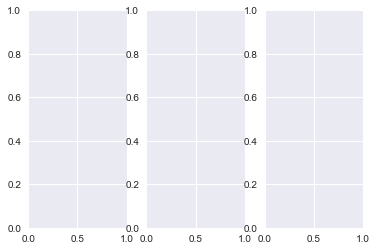

In [21]:
# plot for each block the number correct, separate by condition
f, axes = plt.subplots(1,3)
sns.lineplot(block_range, accuracy_all[0,:], ax=axes[0], markers = 'True', marker = "o")
plt.subplots_adjust(top=0.8,wspace=0.8)
sns.lineplot(block_range, accuracy_all[1,:], ax=axes[1], markers = 'True', marker = "o")
plt.subplots_adjust(top=0.8,wspace=0.8)
sns.lineplot(block_range, accuracy_all[2,:], ax=axes[2], markers = 'True', marker = "o")
plt.subplots_adjust(top=0.8,wspace=0.8)
axes[0].set_xticks([0,1,2])
axes[1].set_xticks([0,1,2])
axes[2].set_xticks([0,1,2])
axes[0].set_xlabel('Block Number')
axes[1].set_xlabel('Block Number')
axes[2].set_xlabel('Block Number')
axes[0].set_ylabel('Accuracy Rate')
axes[1].set_ylabel('Accuracy Rate')
axes[2].set_ylabel('Accuracy Rate')
axes[0].set_ylim(0, 1.05)
axes[1].set_ylim(0, 1.05)
axes[2].set_ylim(0, 1.05)
axes[0].set_title('Target')
axes[1].set_title('Standard')
axes[2].set_title('Oddball')

f.suptitle(SBJ + ' Condition and Accuracy in Oddball Task') # can also get the figure from plt.gcf()
if os.path.isdir(results_dir + 'BHV/ODD/accuracy/') == False:
    os.makedirs(results_dir + 'BHV/ODD/accuracy/')
plt.savefig(results_dir+'BHV/ODD/accuracy/'+SBJ+'_acc_condition'+fig_type)
